In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
df = pd.read_csv("FuelEfficiency.csv")

In [2]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [3]:
num_gears = df['# Gears'].value_counts()
mpg_rating = df['CombMPG'].value_counts()

In [4]:
df2 = df[['# Gears','CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,# Gears,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,7,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


# Question 1

#### What conclusion are you able to reach?

Answer: Based from the different visualizations below, it shows that the combined MPG rating and the number of gears have a negative correlation. 

#### Scatter Plot

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

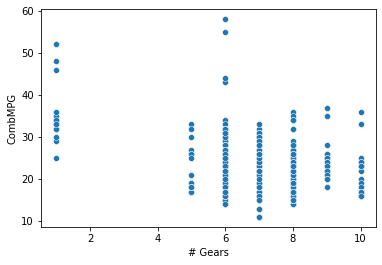

In [6]:
sns.scatterplot(data = df, x = '# Gears', y = 'CombMPG')

#### Displot

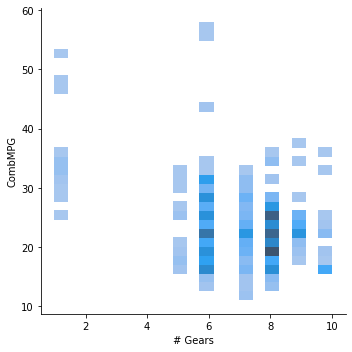

In [7]:
sns.displot(data = df, x = '# Gears', y = 'CombMPG')

#### Boxplot

[Text(0, 0, '1'),
 Text(1, 0, '5'),
 Text(2, 0, '6'),
 Text(3, 0, '7'),
 Text(4, 0, '8'),
 Text(5, 0, '9'),
 Text(6, 0, '10')]

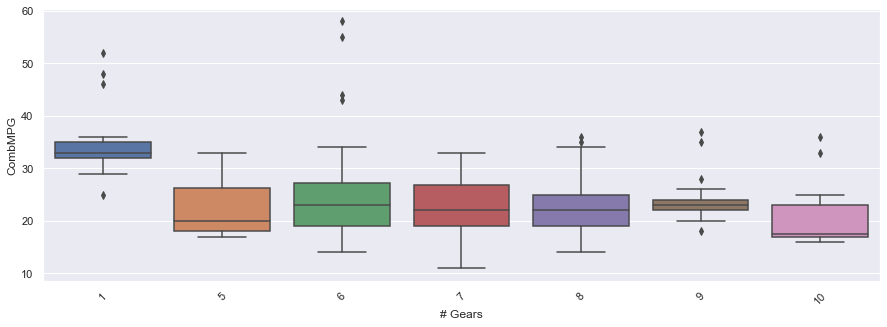

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(x = '# Gears', y = 'CombMPG', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### Heatmap

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

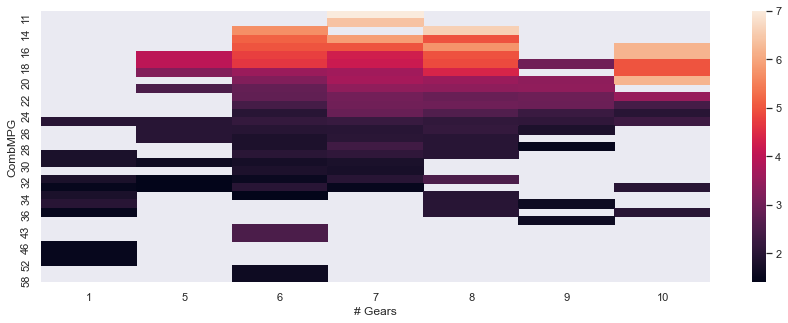

In [9]:
df2 = df.pivot_table(index='CombMPG', columns='# Gears', values='Eng Displ', aggfunc='mean')
sns.heatmap(df2)

# Question 2

In [10]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0,}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0,}
totalPurchases = 0

for _ in range(10000):
    ageDecade = random.choice([20,30,40,50,60,70])
    purchaseProbability = float(ageDecade) / 100.0
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

In [11]:
totals

{20: 1660, 30: 1652, 40: 1630, 50: 1670, 60: 1669, 70: 1719}

In [12]:
purchases

{20: 339, 30: 494, 40: 646, 50: 834, 60: 1004, 70: 1190}

In [13]:
totalPurchases

4507

In [15]:
PEF = float(purchases[20]) / float(totals[20])
print('P(purchase | 20s): ' + str(PEF))

P(purchase | 20s): 0.20421686746987952


In [16]:
PF = float(totals[20] / 100000.0)
print("P(20's): " +str(PF))

P(20's): 0.0166


In [17]:
PE = float(totalPurchases / 100000.0)
print("P(Purchases): " +str(PE))

P(Purchases): 0.04507


In [18]:
print("P(20's Purchases): " +str(float(purchases[20] / 100000.0)))

P(20's Purchases): 0.00339


#### Proving that E and F are independent

In [19]:
EF = (PE * PF) / PF
EF

0.04507

#### Verifying that P(E|F) is approximately equal to P(E)

In [20]:
EF == PE

True

# Question 3: Linear Regression

In [21]:
%matplotlib inline
import numpy as np
from pylab import *

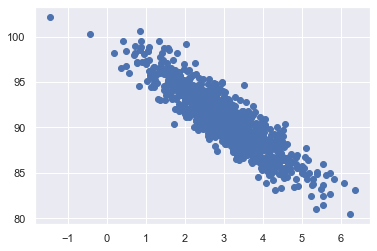

In [30]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.5, 1000))* 3

scatter(pageSpeeds, purchaseAmount)

In [31]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [32]:
r_value ** 2

0.7961810089903391

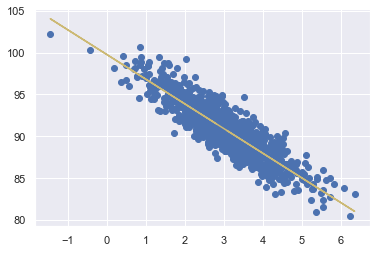

In [33]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='y')
plt.show()

#### Increase the amount of random variation in the test data and see the effect on the r-squared error value. 

Conclusion: The r-square value decreases as the random variation in the test data increases.

# Question 4: Polynomial Regression 

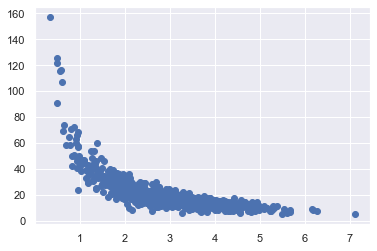

In [35]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)  /  pageSpeeds

scatter(pageSpeeds, purchaseAmount)

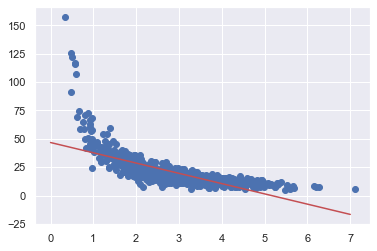

In [45]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x,y,1))


xp = np.linspace(0, 7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c ='r')
plt.show()

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
r2

0.5024941304548026

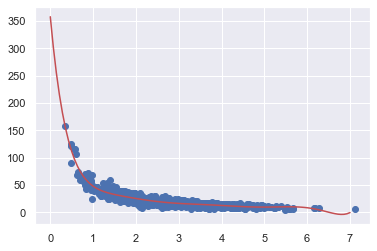

In [47]:
p4 = np.poly1d(np.polyfit(x,y,8))

xp = np.linspace(0, 7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c ='r')
plt.show()

#### Q: Can you obtain a more precise fit with larger orders?

Answer: Based on the visualization, yes you can obtain a more precise fit with larger orders.

#### Do you begin to see overfitting, despite the fact that the r-squared score appears to be acceptable for this specific dataset?

Answer: Yes, even though the precision of the r-squared score appears to be acceptable, I think there is an overfitting.

In [48]:
r2 = r2_score(y, p4(x))
r2

0.8814395663681419